In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline
warnings.filterwarnings('ignore')

In [262]:
train_data = pd.read_csv('train.csv')

train_data.sample(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7359,8899,27,2.0,60.085225,NaN,1.0,16,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,137285.697444
7810,11218,53,2.0,45.765216,26.863418,6.0,8,14.0,1976,0.313925,B,B,22,4625,11,3855.0,2,10,B,227510.959000
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,217874.997452
9756,13583,27,2.0,58.943039,3.319486,1.0,11,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B,142789.948977
6592,10230,6,1.0,47.908596,NaN,1.0,9,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,135358.463318
4953,7839,23,1.0,32.689327,30.176004,0.0,4,12.0,2018,0.034656,B,B,0,168,0,NaN,0,0,B,63624.320283
4734,12652,6,1.0,40.022999,3.953911,1.0,3,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,132042.522763
4868,2997,1,1.0,41.176905,NaN,1.0,14,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,135612.754405
4083,16067,36,1.0,33.321439,20.909460,5.0,5,5.0,1959,0.087619,B,B,8,1497,5,NaN,1,0,B,158409.156979


### Описание датасета
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [263]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

## Exploratory data analysis

In [264]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [265]:
# кол-во значений в признаках
# переведем признаки с небльшим кол-во значений в категориальные
pd.DataFrame({item:len(train_data[item].unique()) for item in train_data[train_data.columns.tolist()].select_dtypes(include=['int64', 'float64']).columns.tolist()}.items(), \
columns = ['Name', 'Count']).sort_values(by='Count').head(13)

,Name,Count
14,Helthcare_2,7
2,Rooms,9
15,Shops_1,16
12,Social_3,30
6,Floor,33
7,HouseFloor,44
10,Social_1,51
5,KitchenSquare,58
13,Healthcare_1,80
8,HouseYear,97


### класс конвейера

In [266]:
class DataPipeline:    
    def __init__(self, **kwargs):
        # уровень стат значимости
        self.alpha = 0.05
        # пороговое значение в три сигмы
        self.threashold = 3              
        """Параметры класса"""        
        for key, value in kwargs.items():
            setattr(self, key, value)    
        assert self.data is not None
        # удаляем id
        self.data.drop("Id", axis=1, inplace=True)    

    def transform(self):       
        """Трансформация данных"""              
        # значений не много переводим в категориальный тип
        self.data.DistrictId = self.data.DistrictId.astype("category")
        
        self.data.Social_1 = self.data.Social_1.astype("category")
        self.data.Social_2 = self.data.Social_2.astype("category")
        self.data.Social_3 = self.data.Social_3.astype("category")

        self.data.Shops_1 = self.data.Shops_1.astype("category")
        self.data.Shops_2 = self.data.Shops_2.astype("category")
        
        self.data.Healthcare_1 = self.data.Healthcare_1.astype("category")
        self.data.Helthcare_2  = self.data.Helthcare_2.astype("category")

        # обработка категориальных признаков
        for item in self.property_cat:        
            self._transform_cat_(item)            
        # обработка количественных признаков
        for item in self.property_num:
            self._transform_num_(item)
            
    def _transform_cat_(self, column):
        """Трансформация категориальных признаков"""                
        # заменяем пропуски модой                                   
        self.data[column] = self.data[column].fillna(self.data[column].mode()[0])                    
        # кодируем признак
        self.data[column] = LabelEncoder().fit_transform(self.data[column])
        
    def _transform_num_(self, column):
        """Трансформация количественных признаков"""                      
        # запомнинание пропусков
        self.data['isna'] = np.where(self.data[column].isna(), True, False)                        
        # заполнение пропусков
        self.data[column] = self.data[column].fillna(self.data[column].mean())
        # стандартизация признака
        if column != self.target:
            self.data[column] = StandardScaler().fit_transform(self.data[[column]])                                          
        # обработка выбрасов, вычисляем z-Score        
        z = np.abs(stats.zscore(self.data[column]))                         
        # среднее если данные имеют нормальное распределение, иначе медиана                                    
        if stats.shapiro(self.data[column].values.reshape(-1))[1] < self.alpha:                        
            self.data.loc[z > self.threashold, column] = self.data[column].median()            
        else:            
            self.data.loc[z > self.threashold, column] = self.data[column].mean()                        
        
        # обработка пропусков             
        if True in self.data['isna'].values:
            # используем простуб модель
            model = LinearRegression()
            # формируем обучающие и тестовые наборы
            X_test = self.data[self.data['isna']==True][[item for item in self.data.columns if item != column]]
            X_train = self.data[self.data['isna']==False][[item for item in self.data.columns if item != column]]        
            y_train = self.data[self.data['isna']==False][[column]]        
            # обучение модели
            model.fit(X_train, y_train)
            # выполняем предсказание прзнака
            self.data[self.data['isna']][column] = model.predict(X_test)            
            
        # винсоризация
        #self.data[column] = winsorize(self.data[column], limits=[0.1, 0.1])                  

    def fit(self, df):
        """Обучение модели"""    

    @property    
    def property_num(self):
        """количественные признаки"""
        return self.data[self.data.columns.tolist()].select_dtypes(include=['int64', 'float64']).columns.tolist()
        
    @property    
    def property_cat(self):
        """категориальные признаки"""
        return self.data[self.data.columns.tolist()].select_dtypes(include=['object', 'category']).columns.tolist()
        
    def plot(self, column):      
        plt.figure(figsize = (15, 8))                
        sns.distplot(self.data[column], bins=50)
        
        target_mean = round(self.data[column].mean(), 2)
        target_median = self.data[column].median()
        target_mode = self.data[column].mode()[0]        
        
        y = np.linspace(0, 0.000005, 10)
        plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
        plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
        plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)
        
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.show()        

    def boxplot(self, column):
        """выбросы box-plot"""
        plt.figure(figsize = (16, 8))                 
        self.data.boxplot(column=list(column))              

In [267]:
# создамие конвейера
pipeline = DataPipeline(data=train_data.copy(), target='Price')

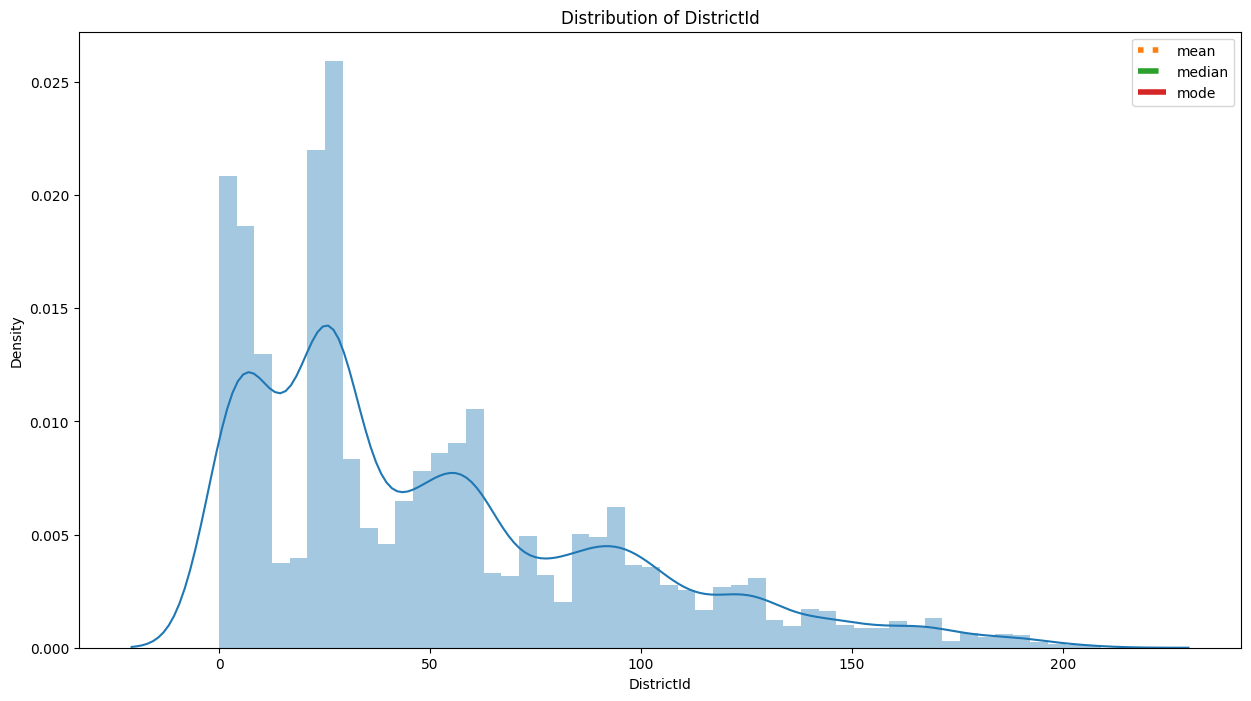

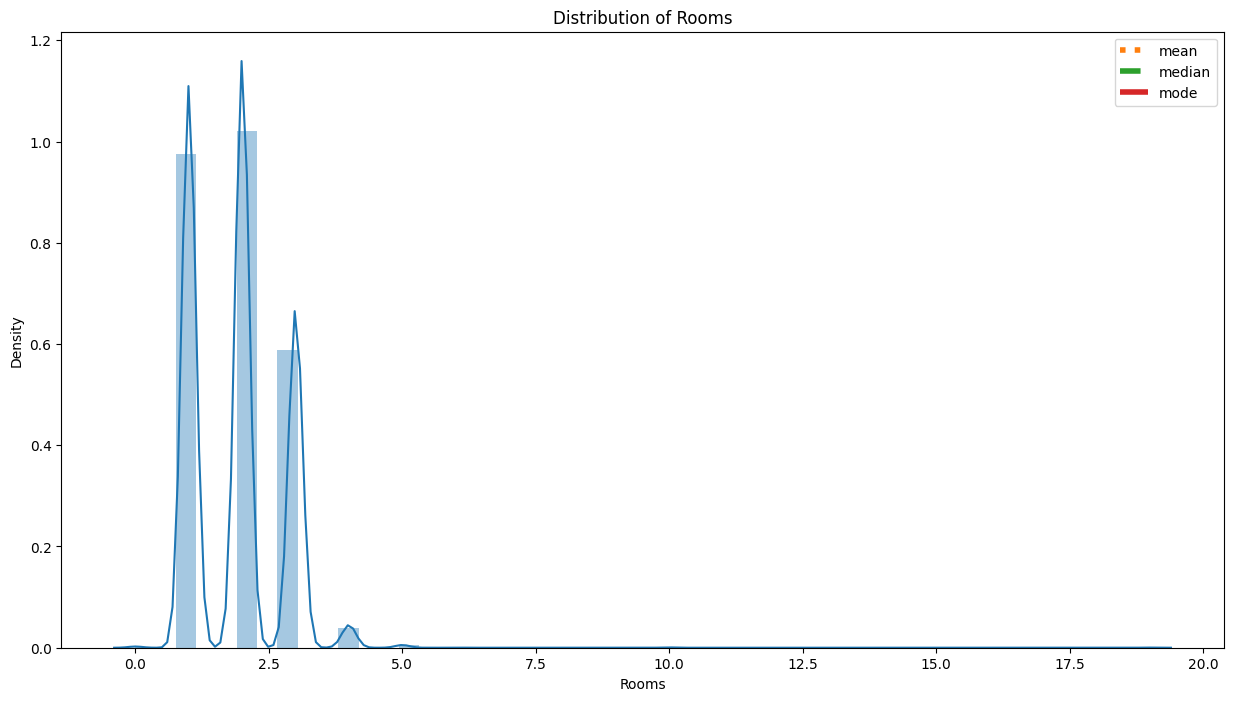

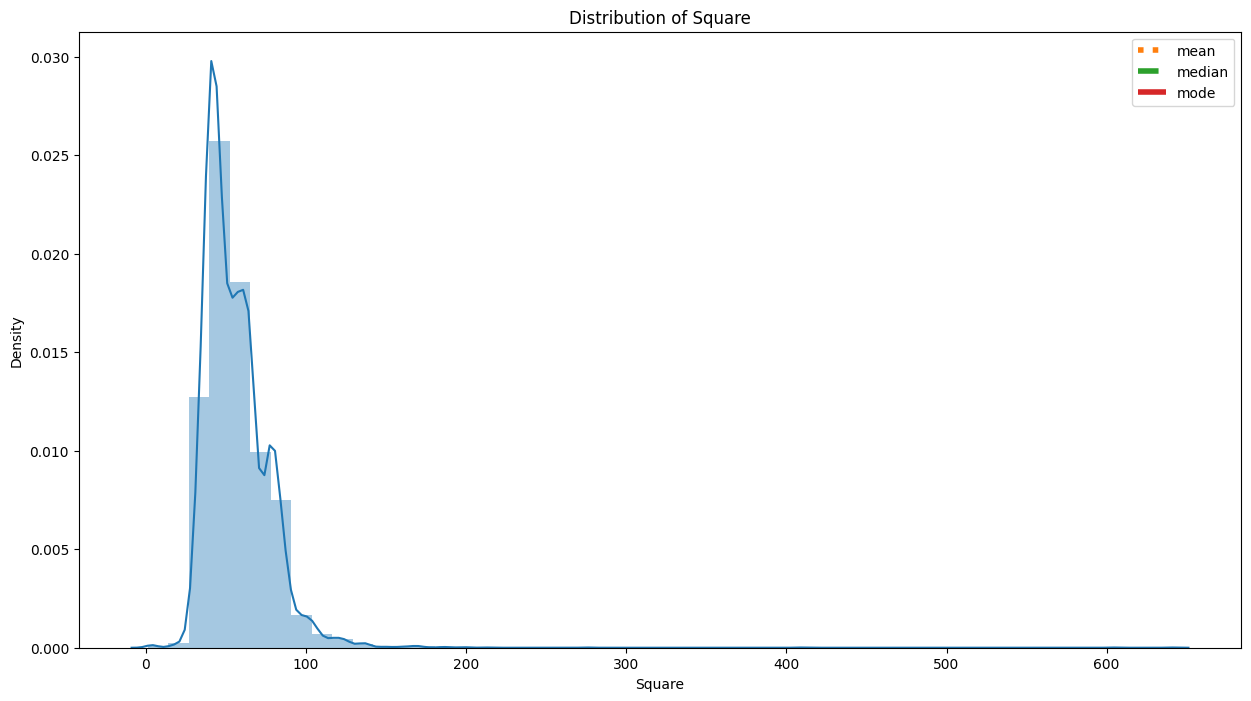

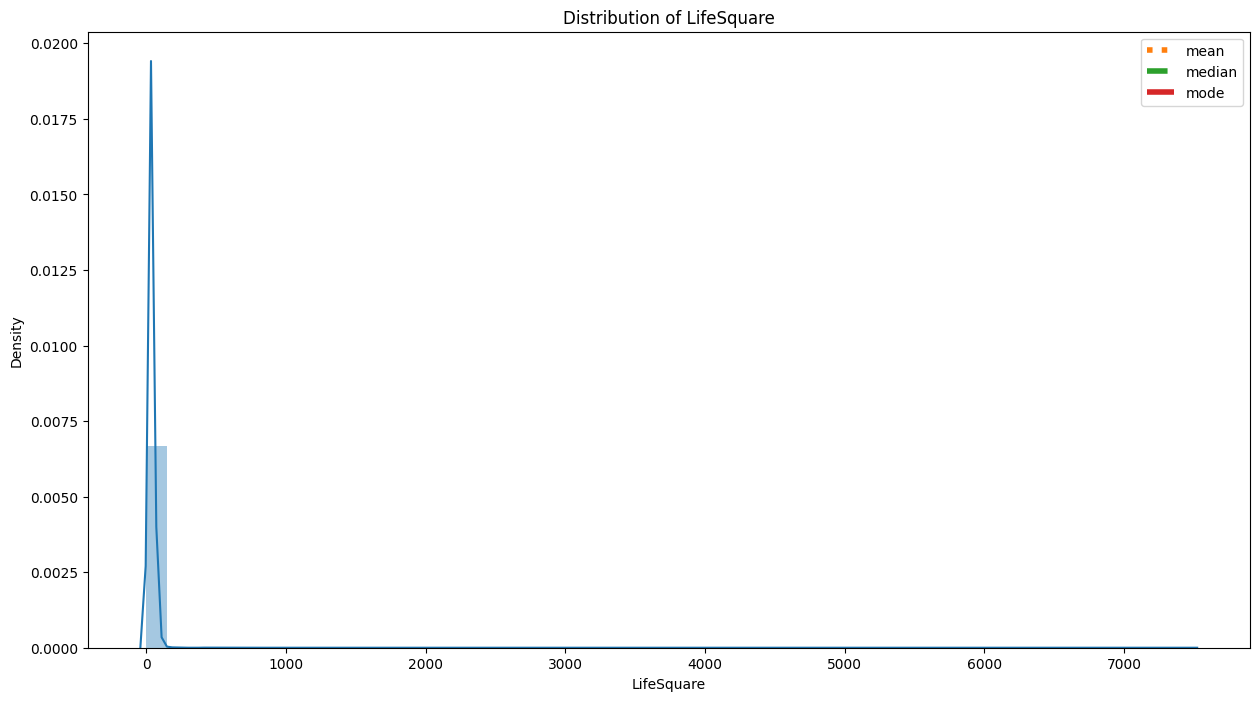

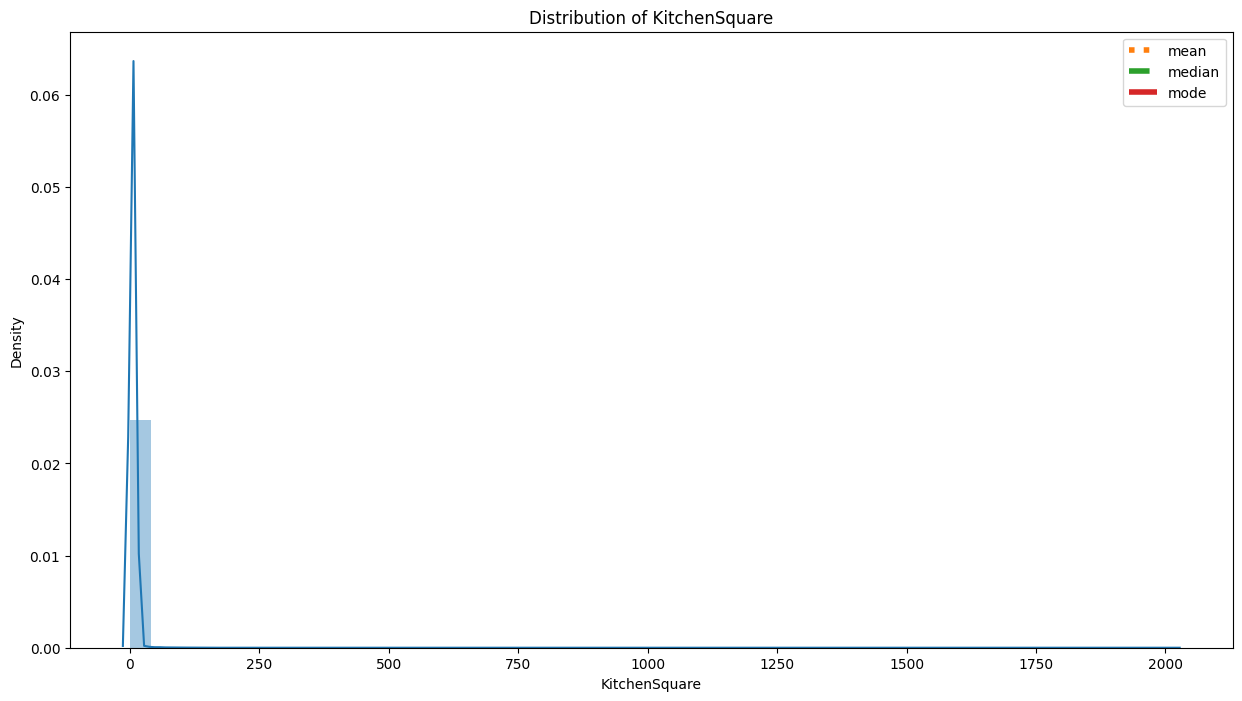

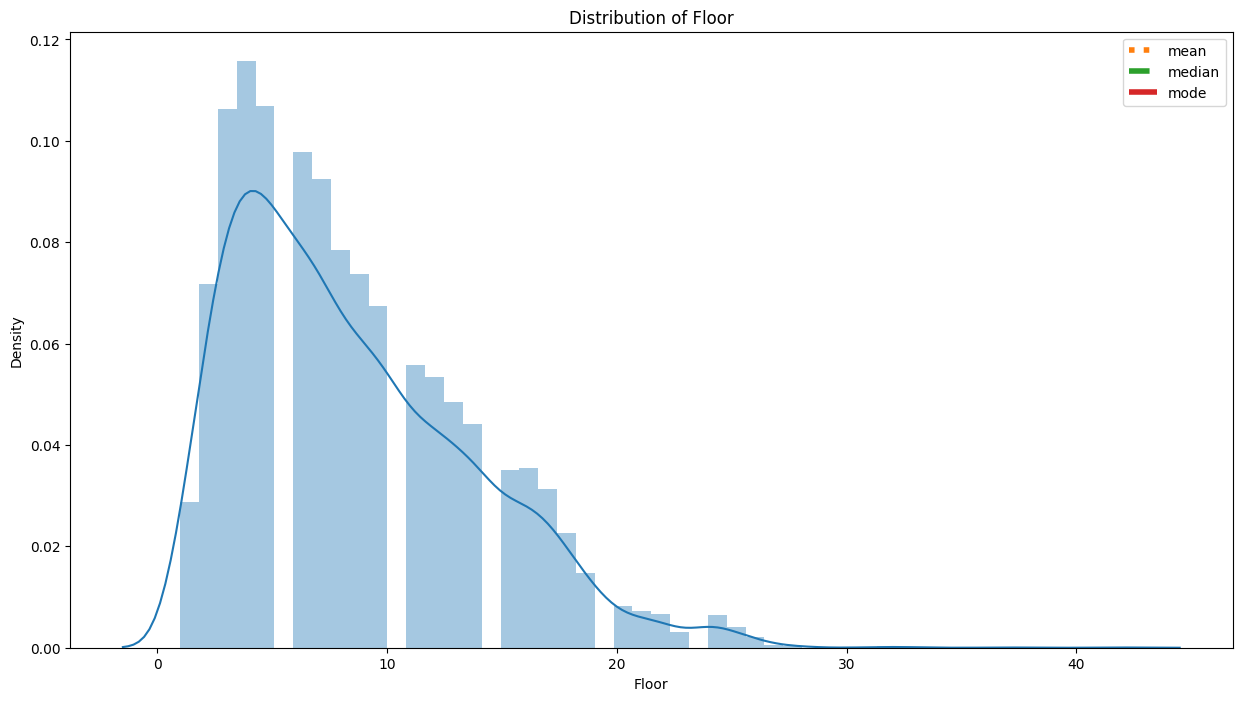

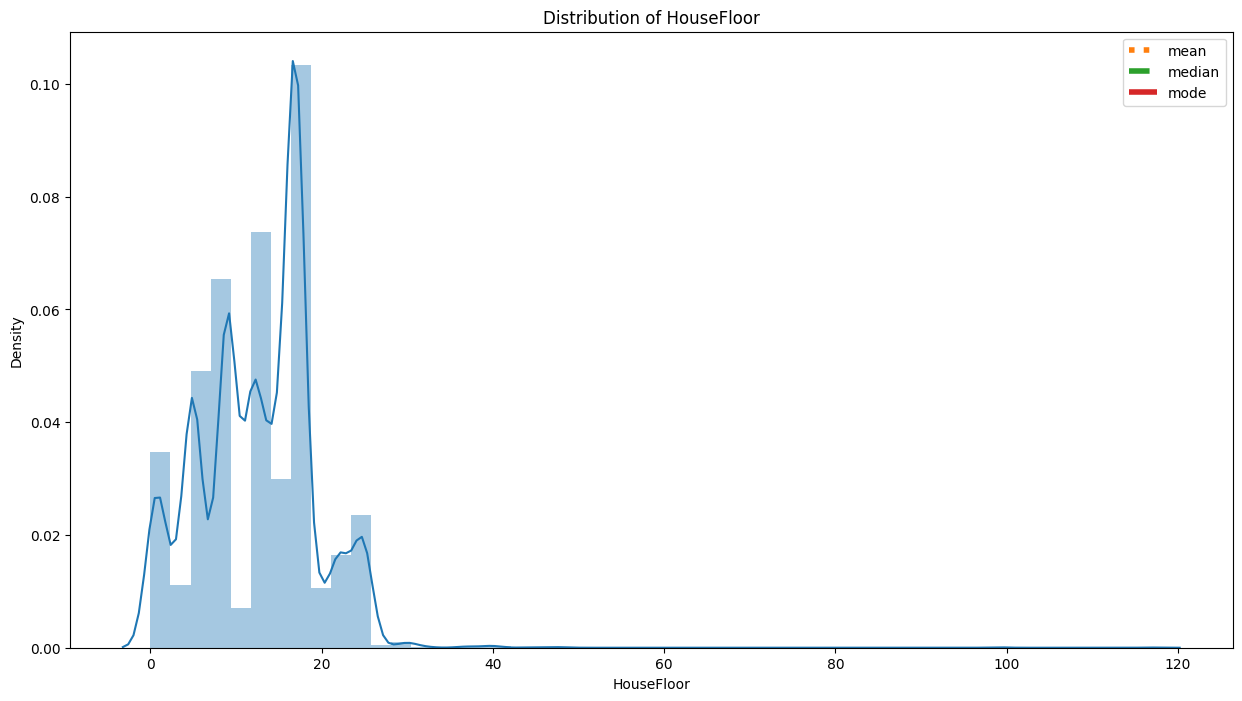

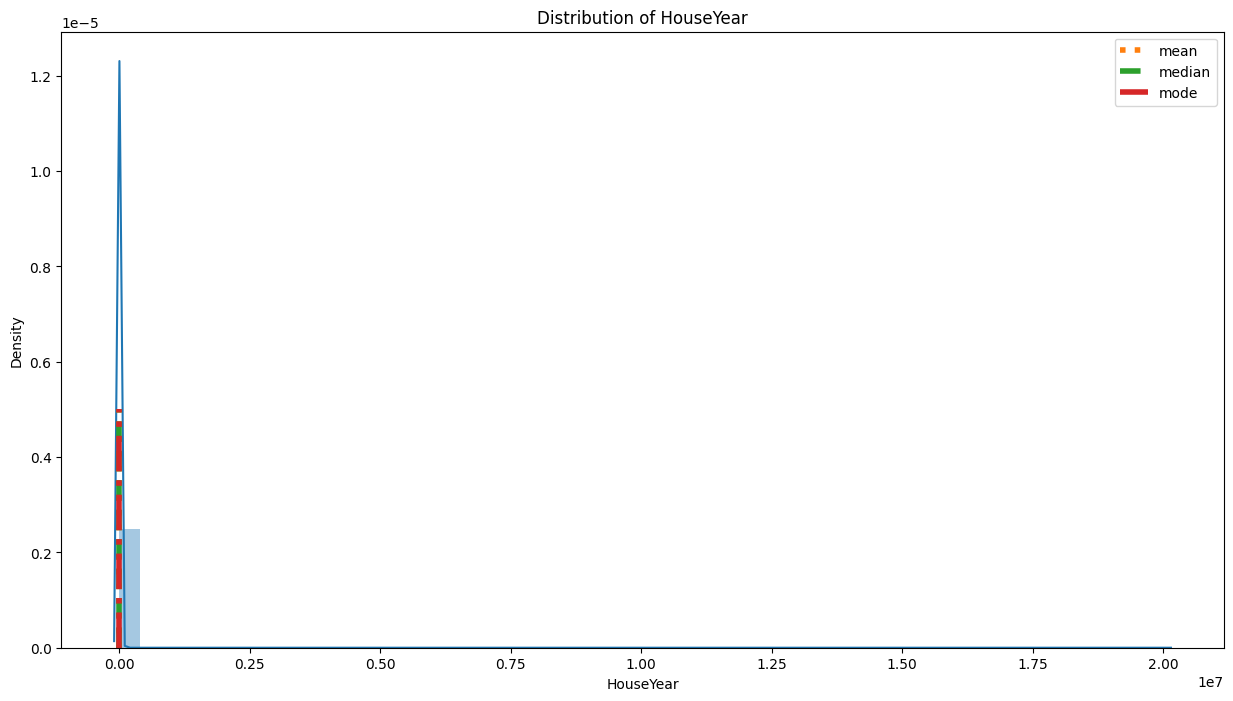

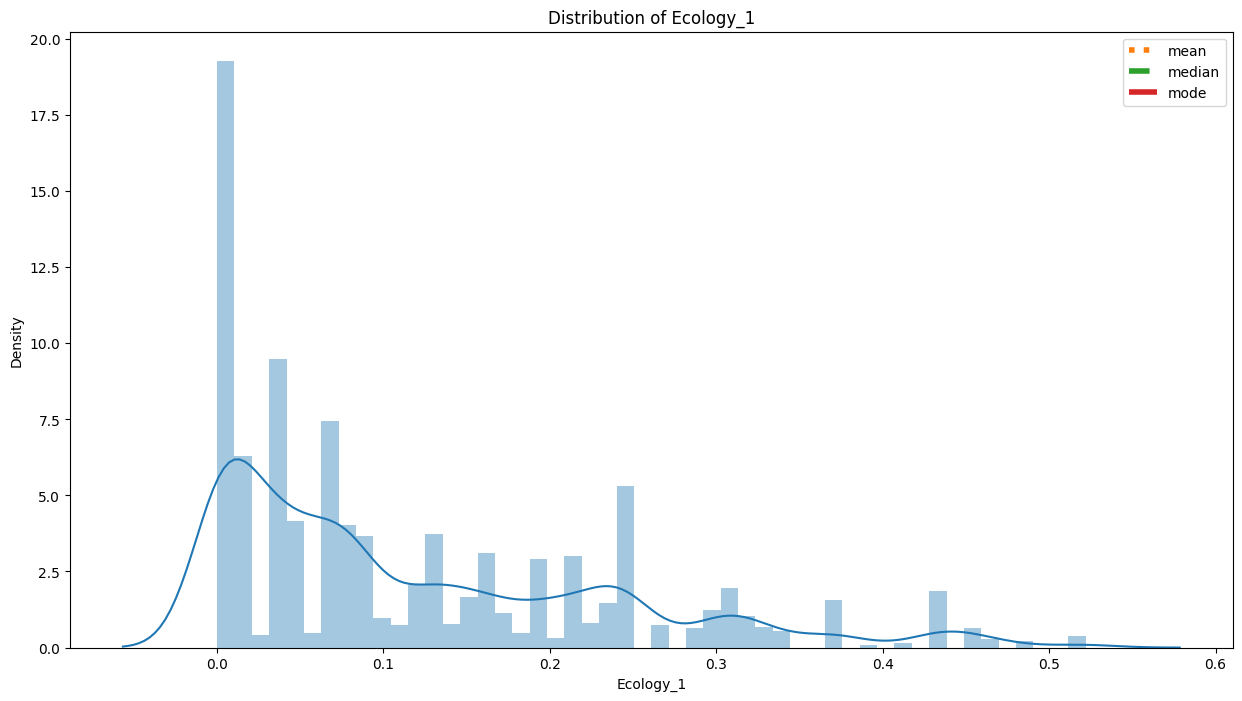

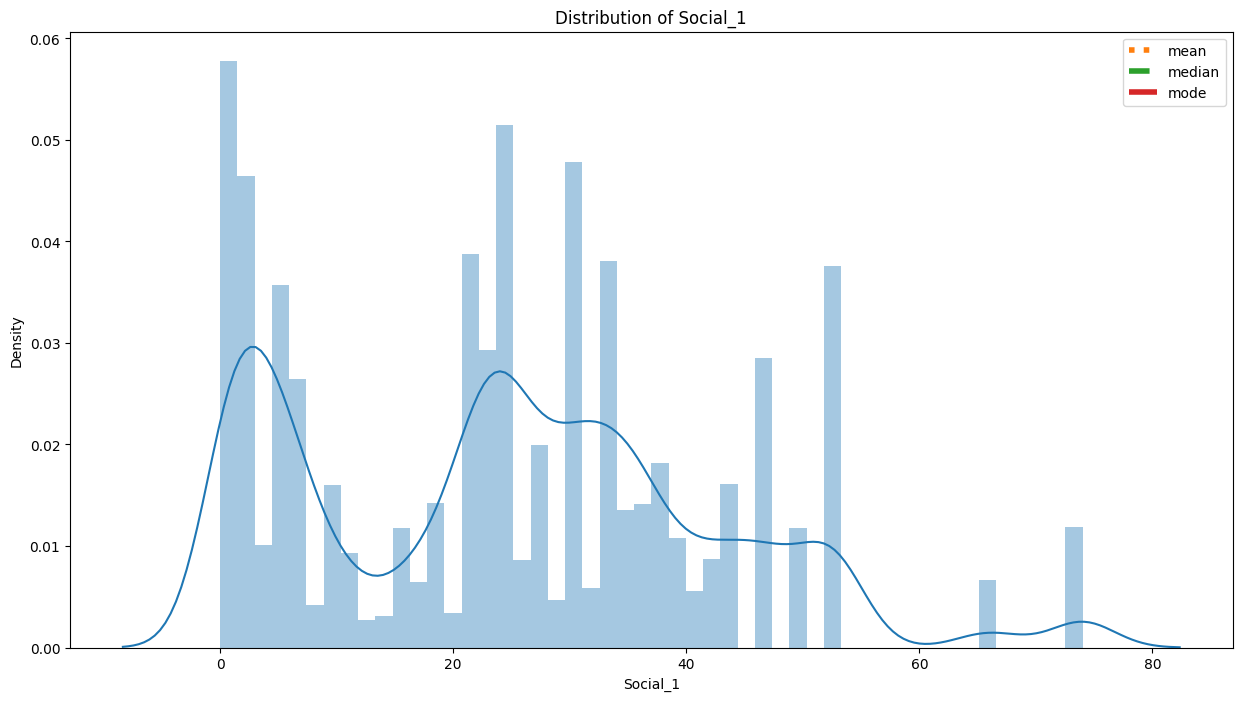

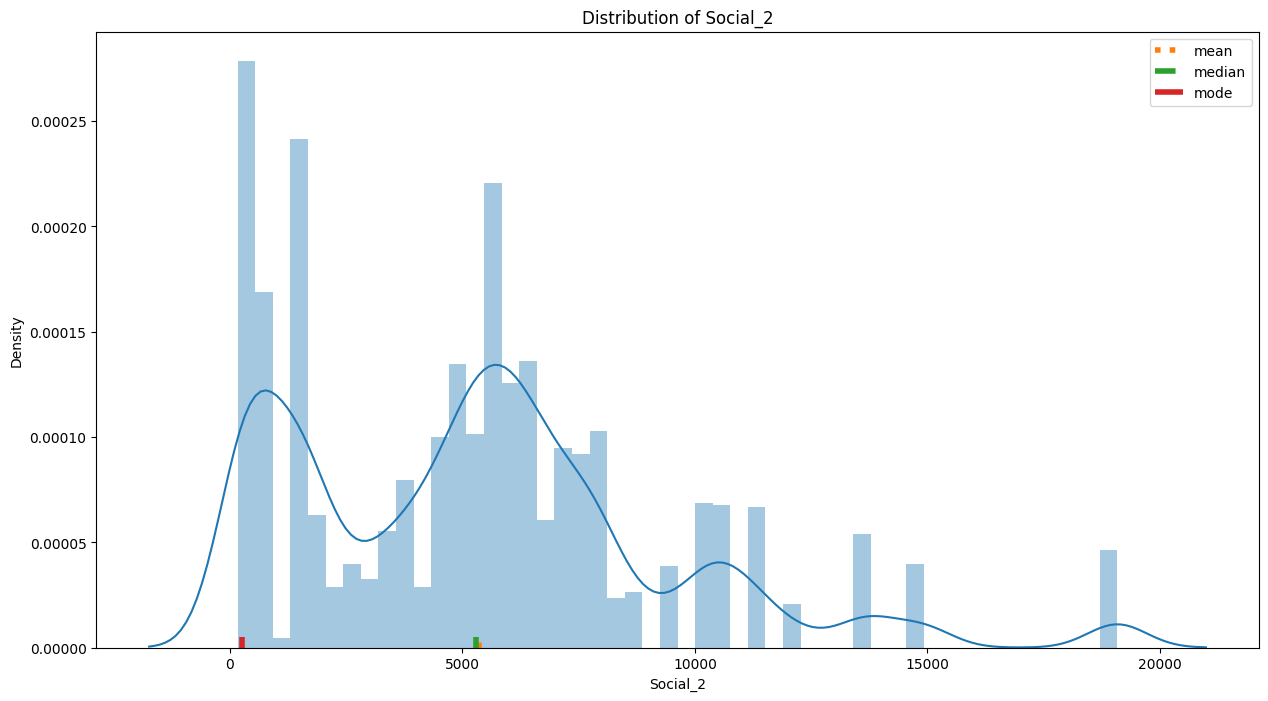

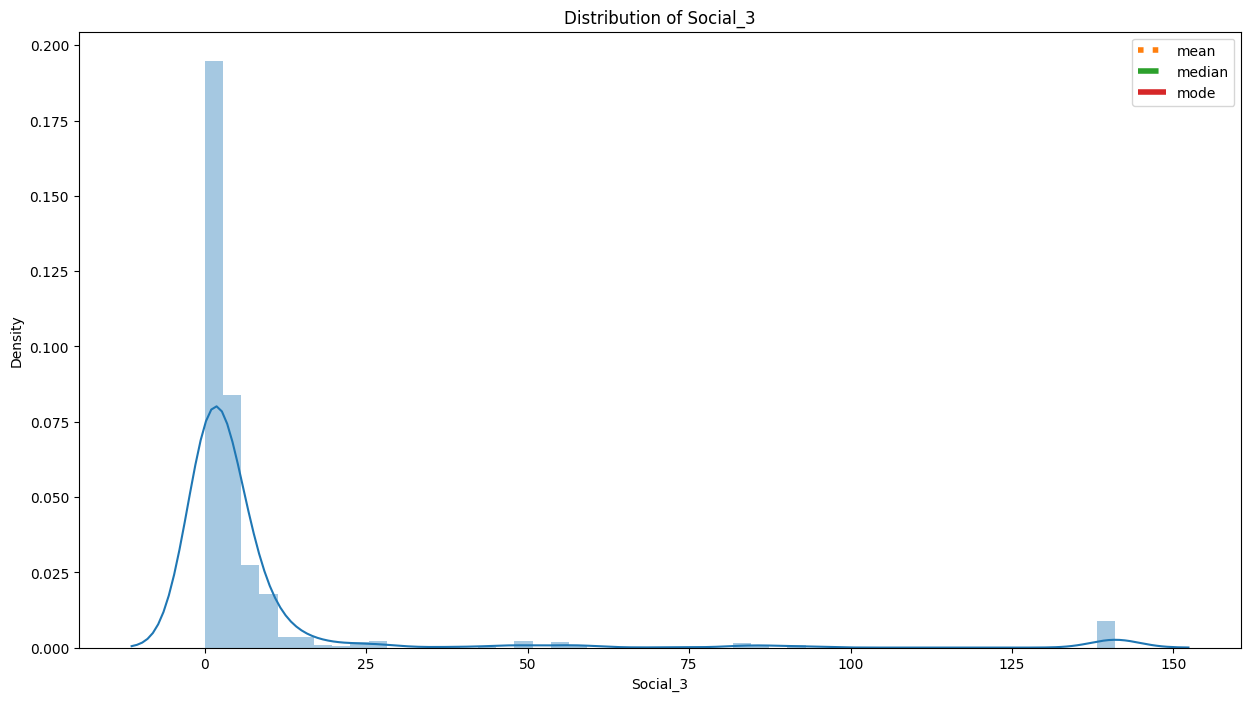

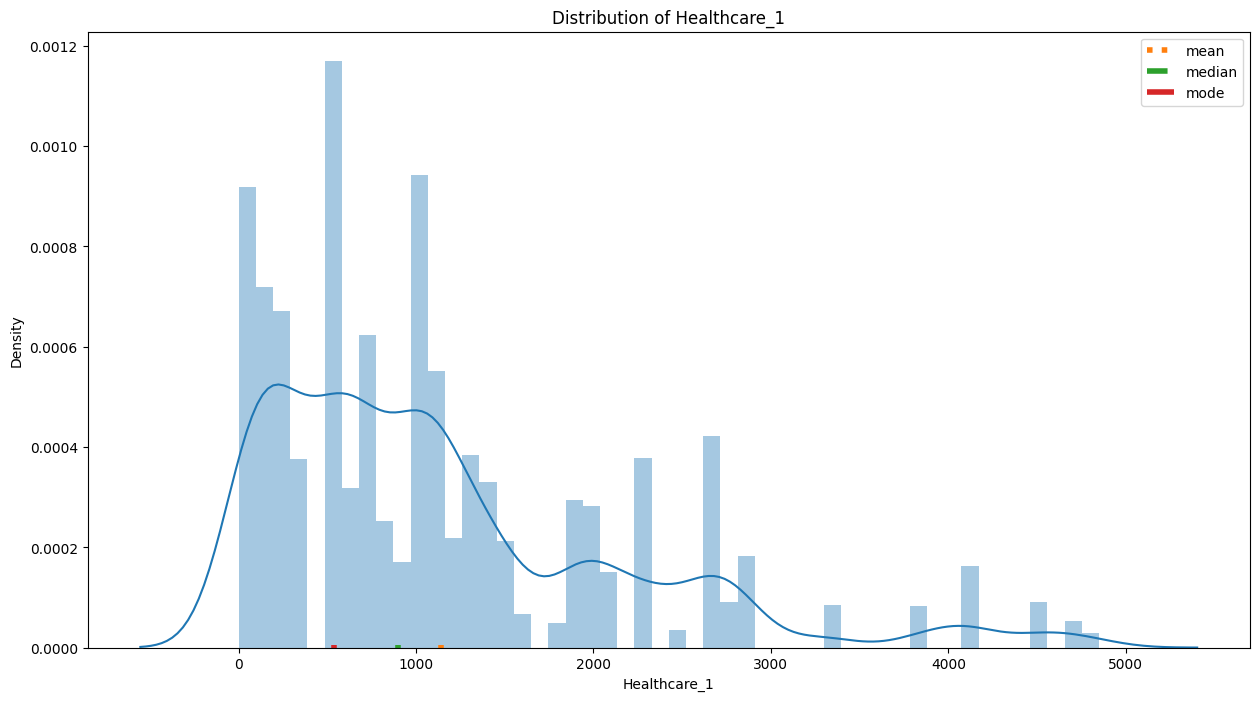

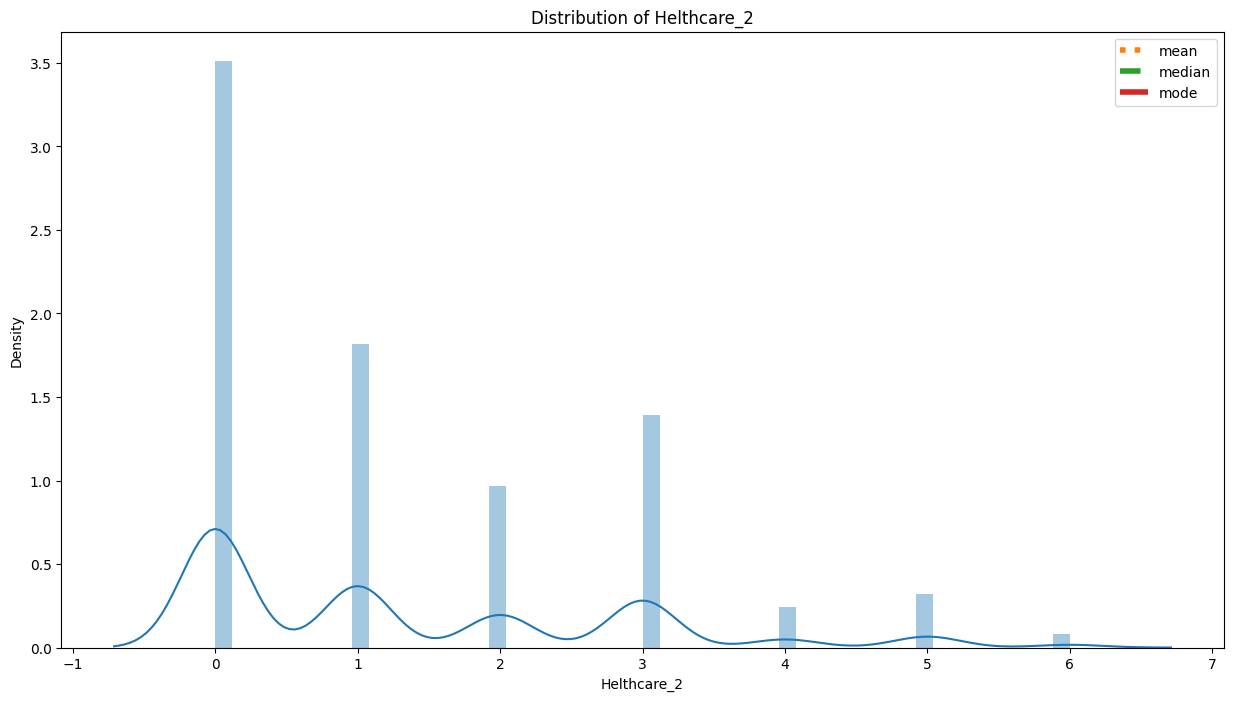

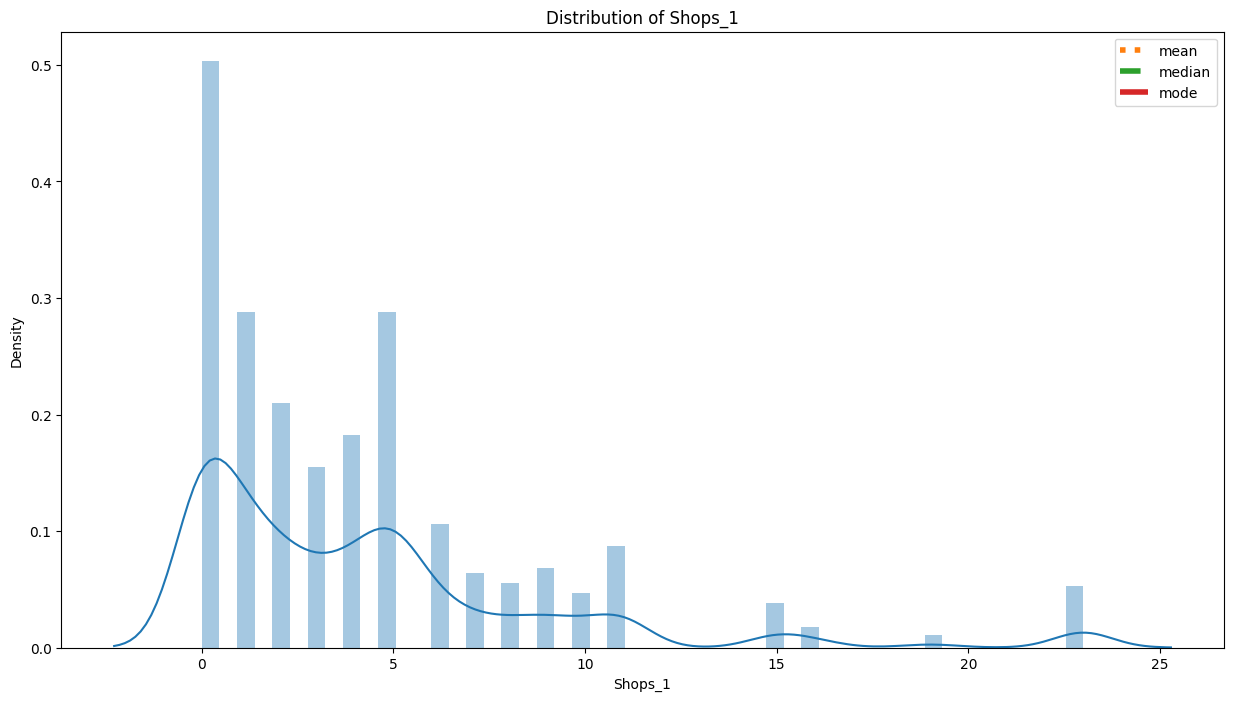

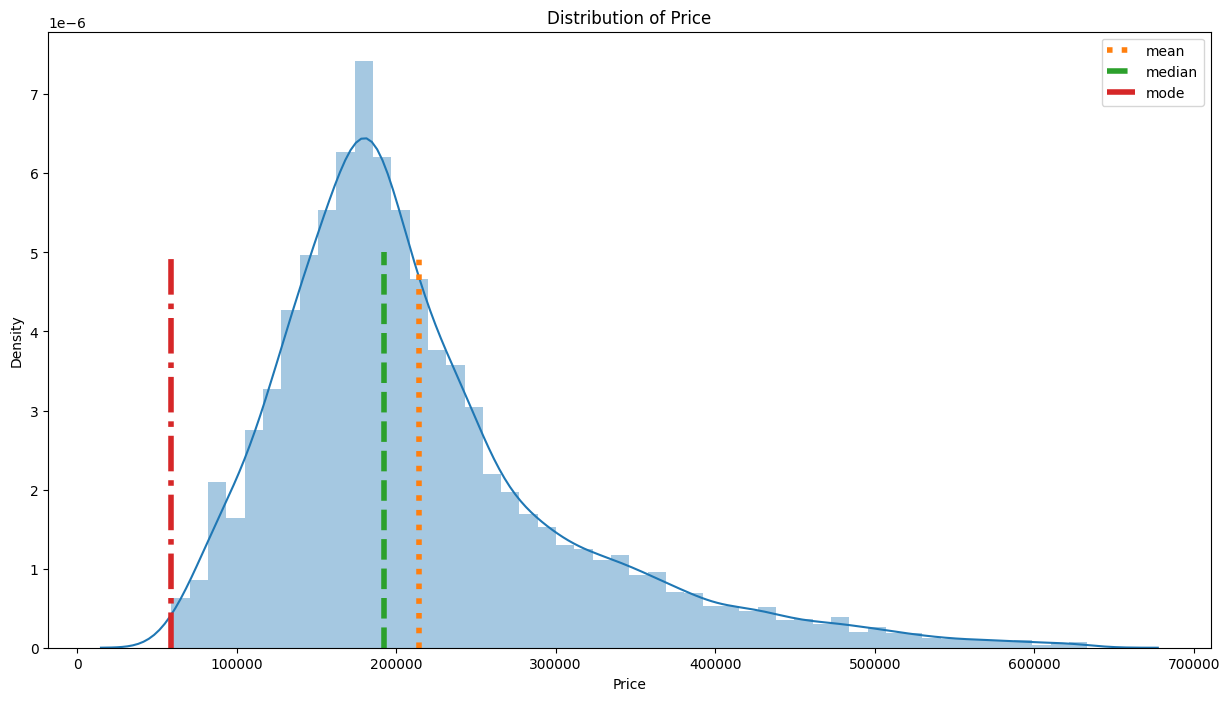

In [268]:
# распределение количественных признаков в исходных данных и осноные статистические данные в них
for item in pipeline.property_num:
    pipeline.plot(item)

In [269]:
# подготовка признаков
pipeline.transform()

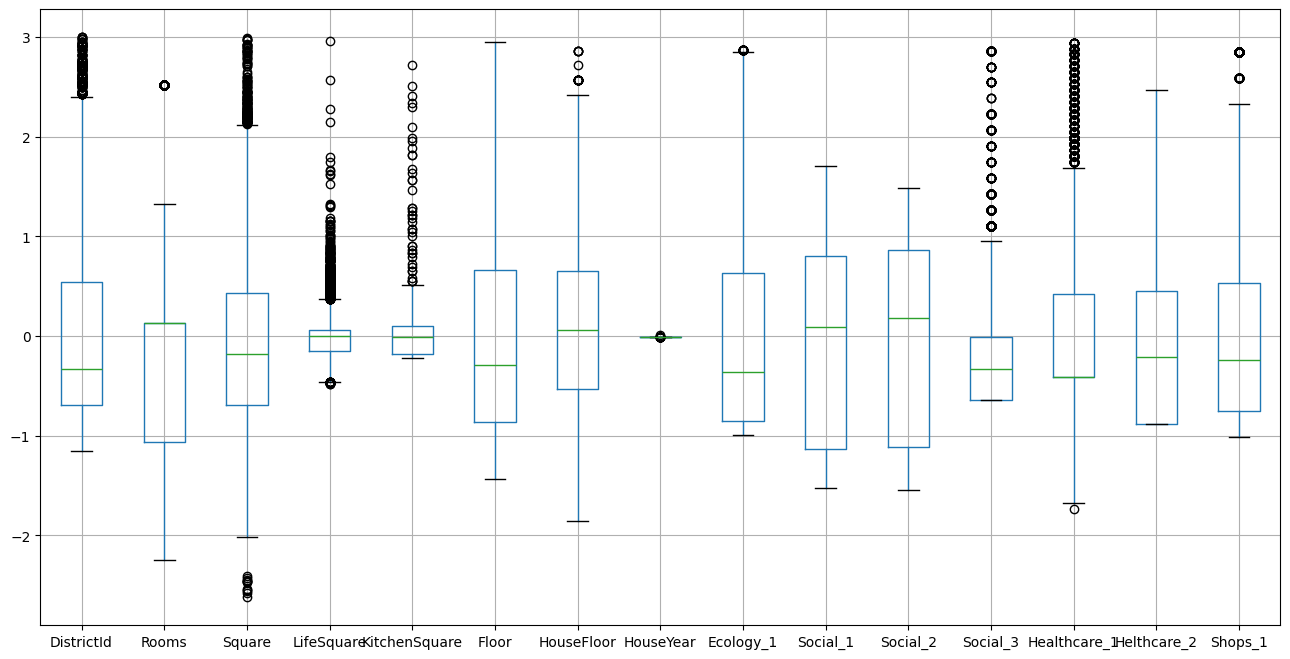

In [270]:
pipeline.boxplot((item for item in pipeline.property_num if item != pipeline.target))

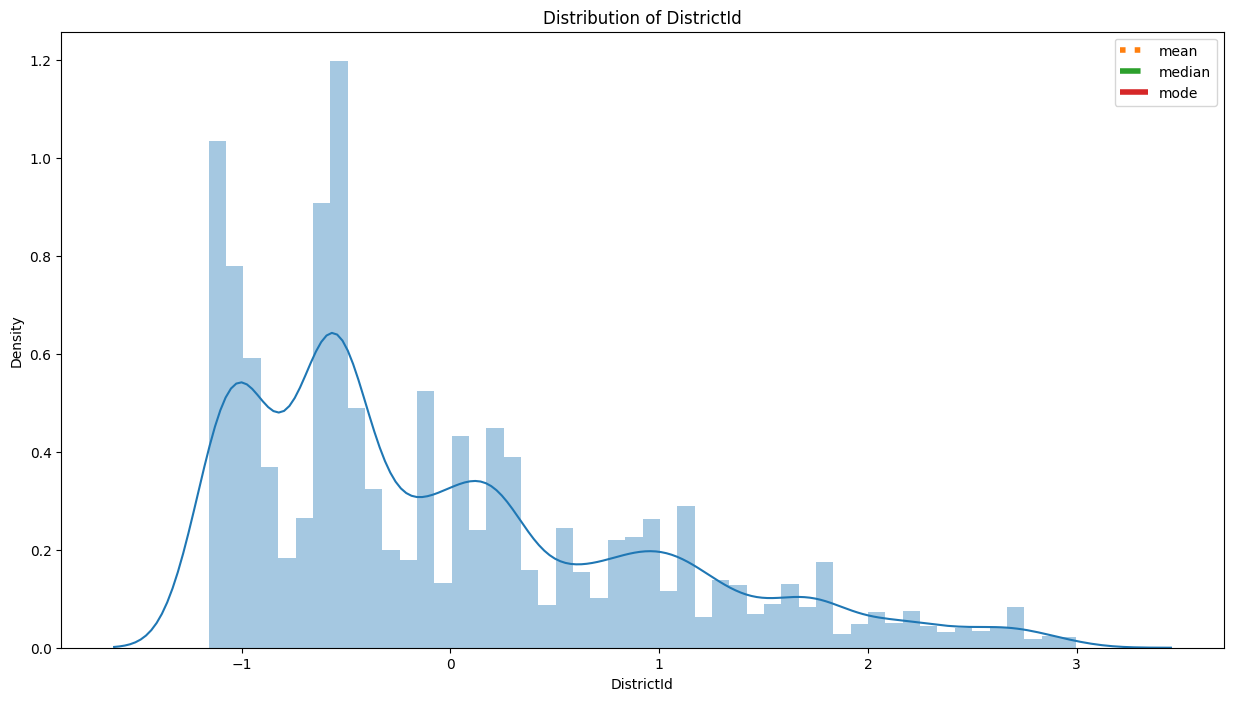

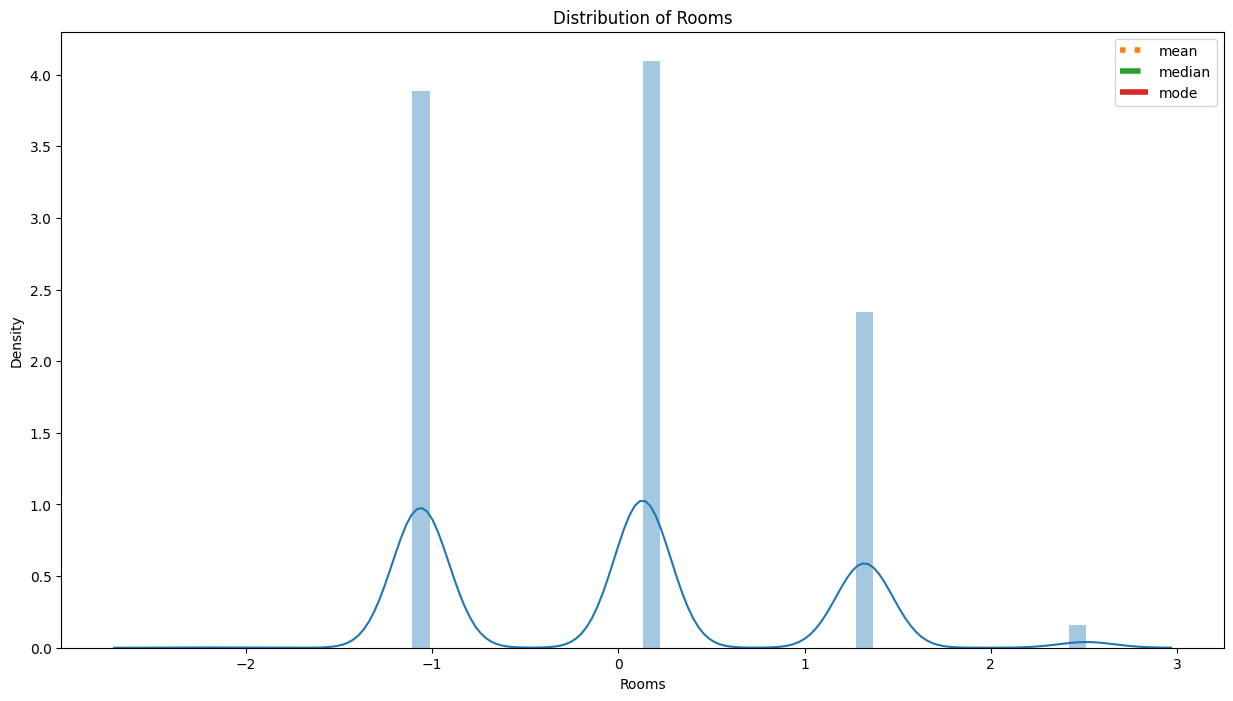

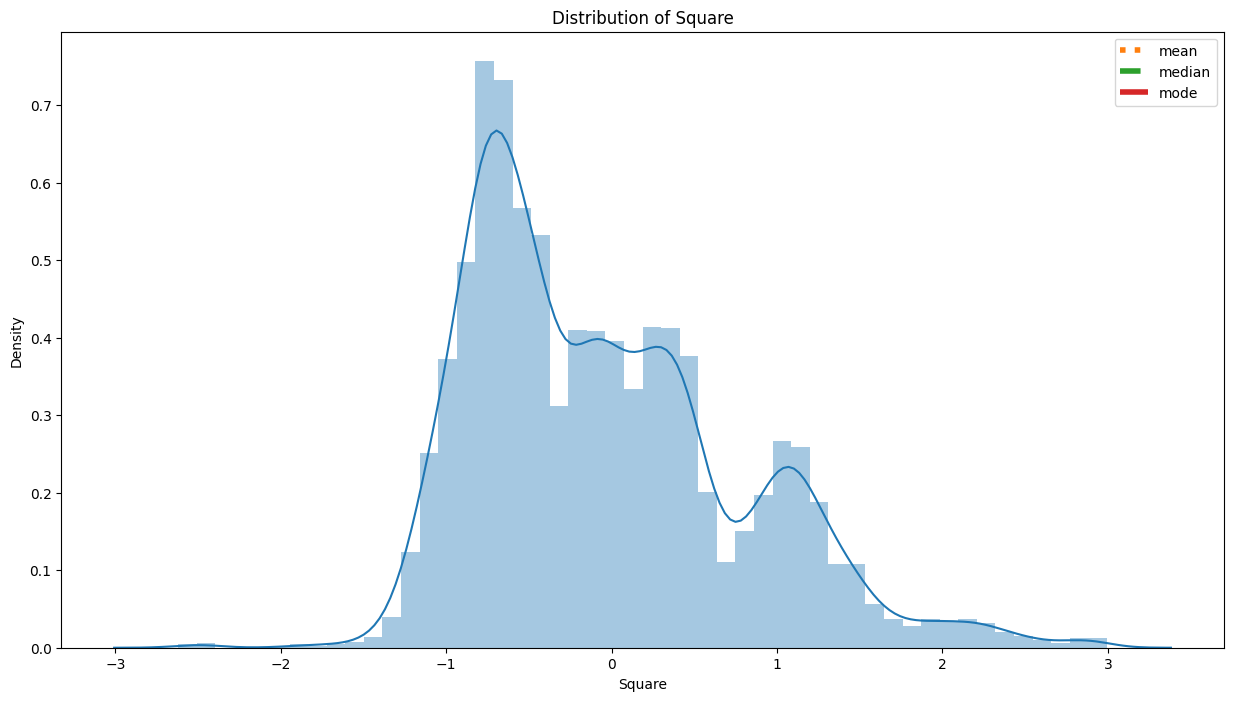

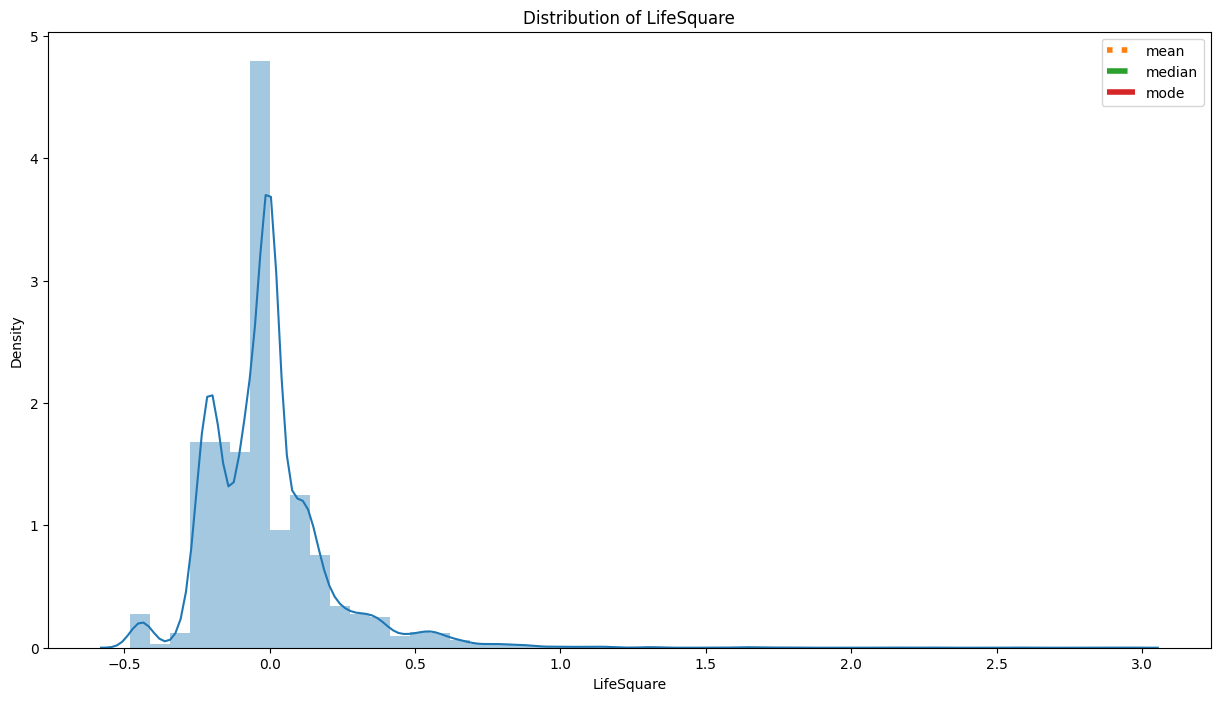

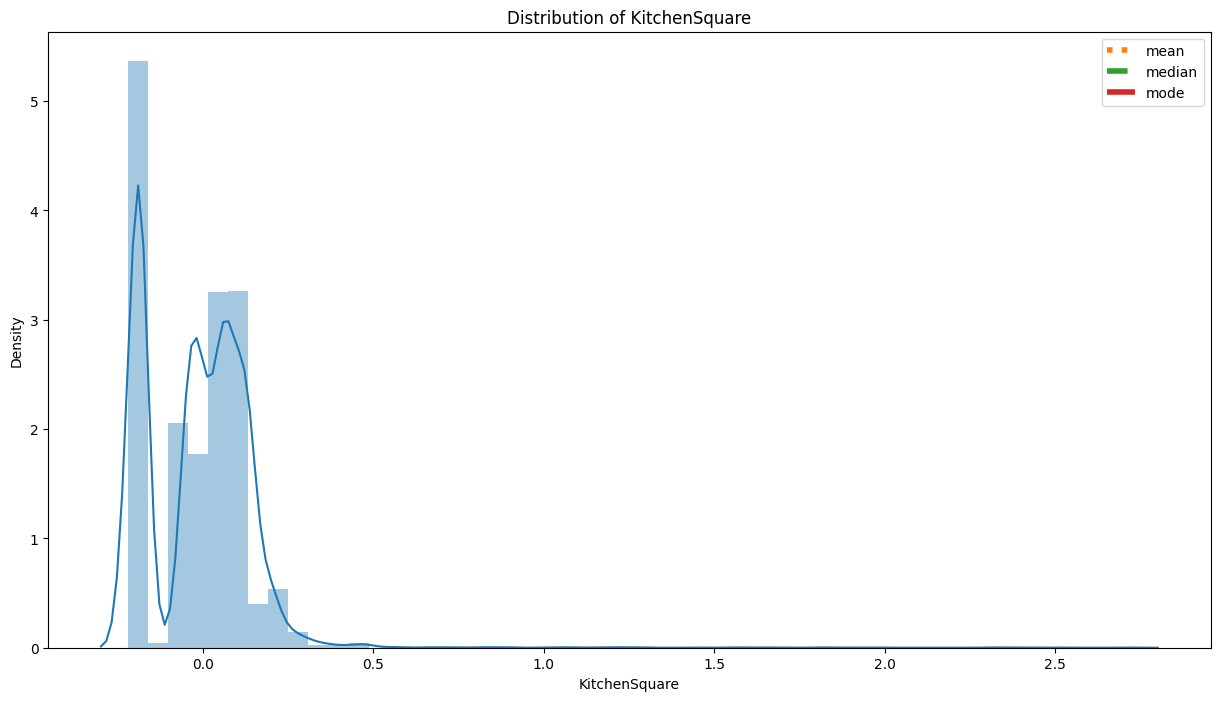

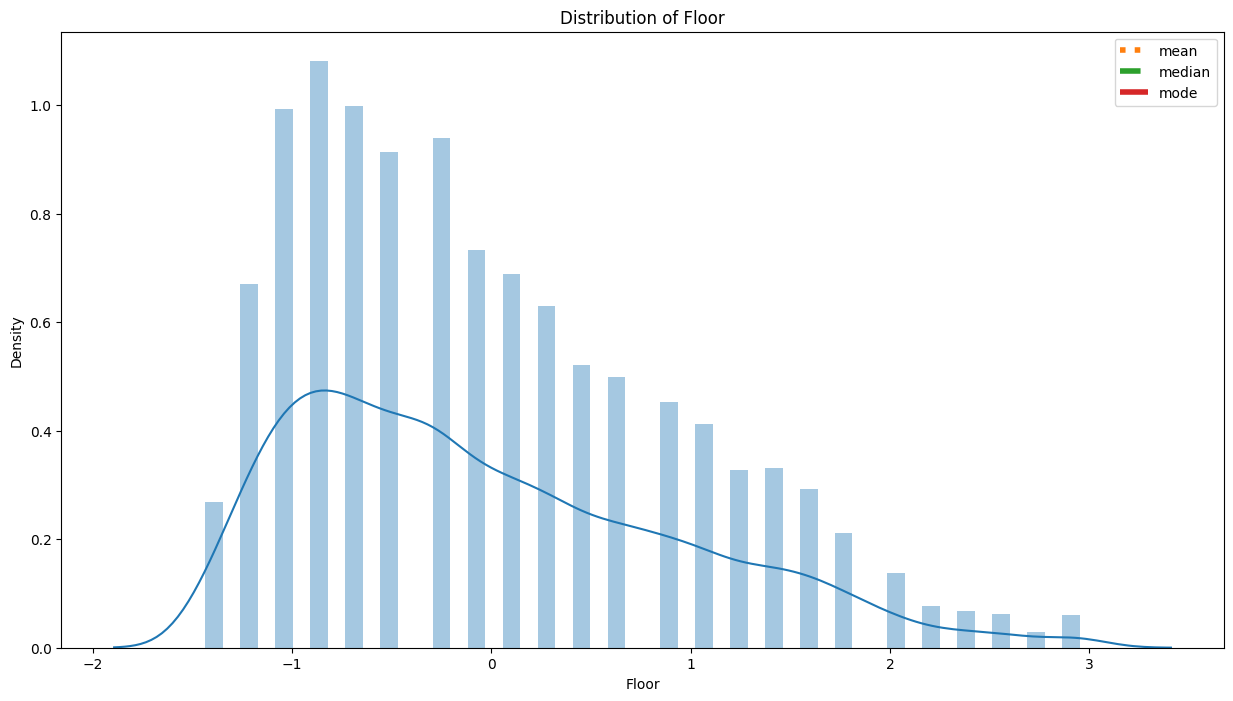

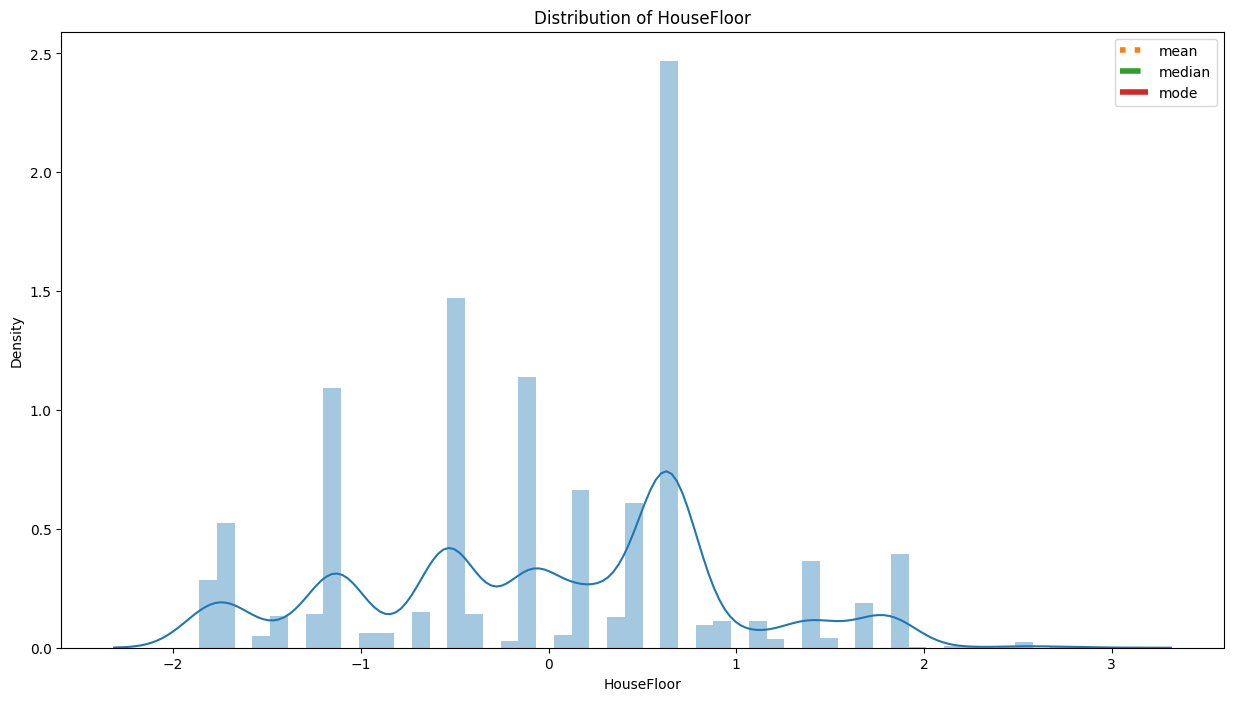

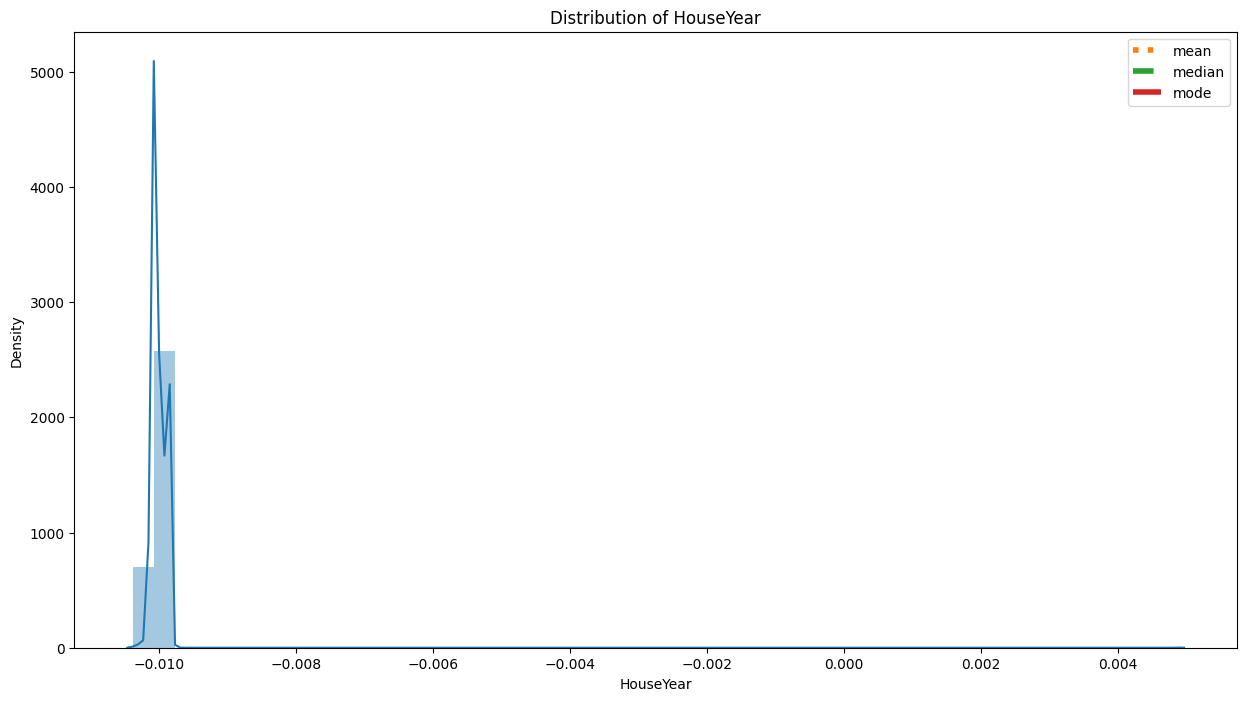

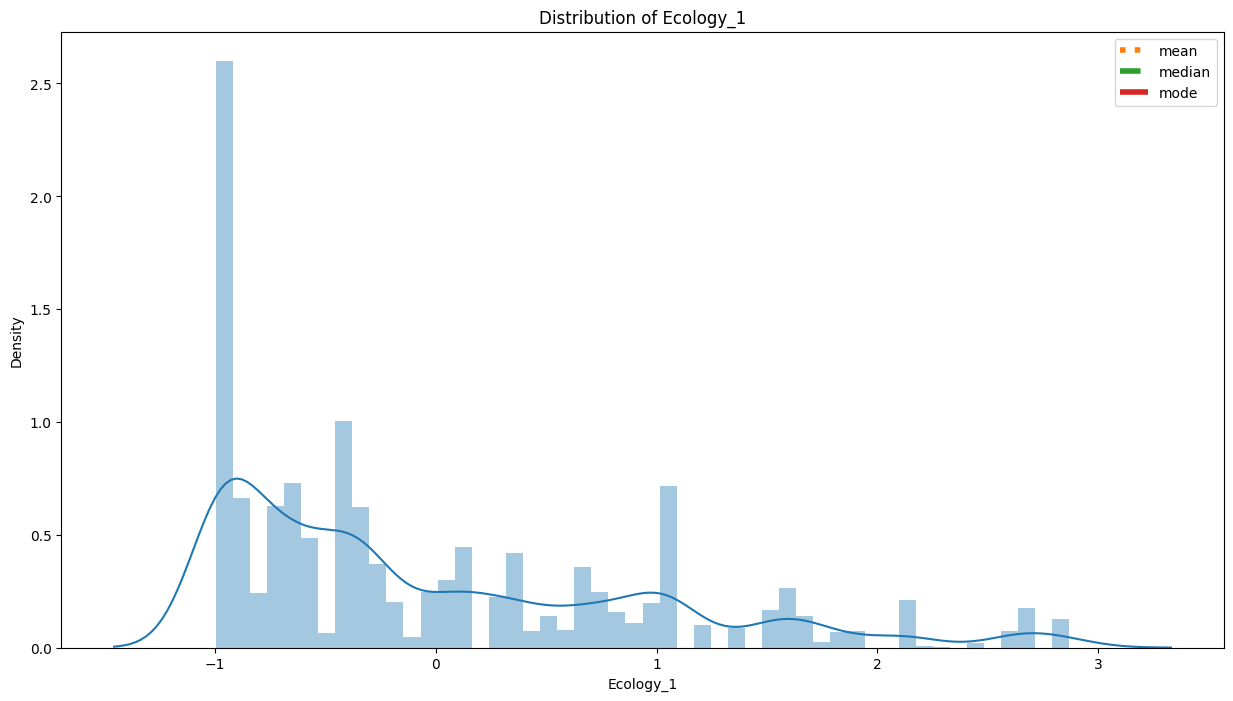

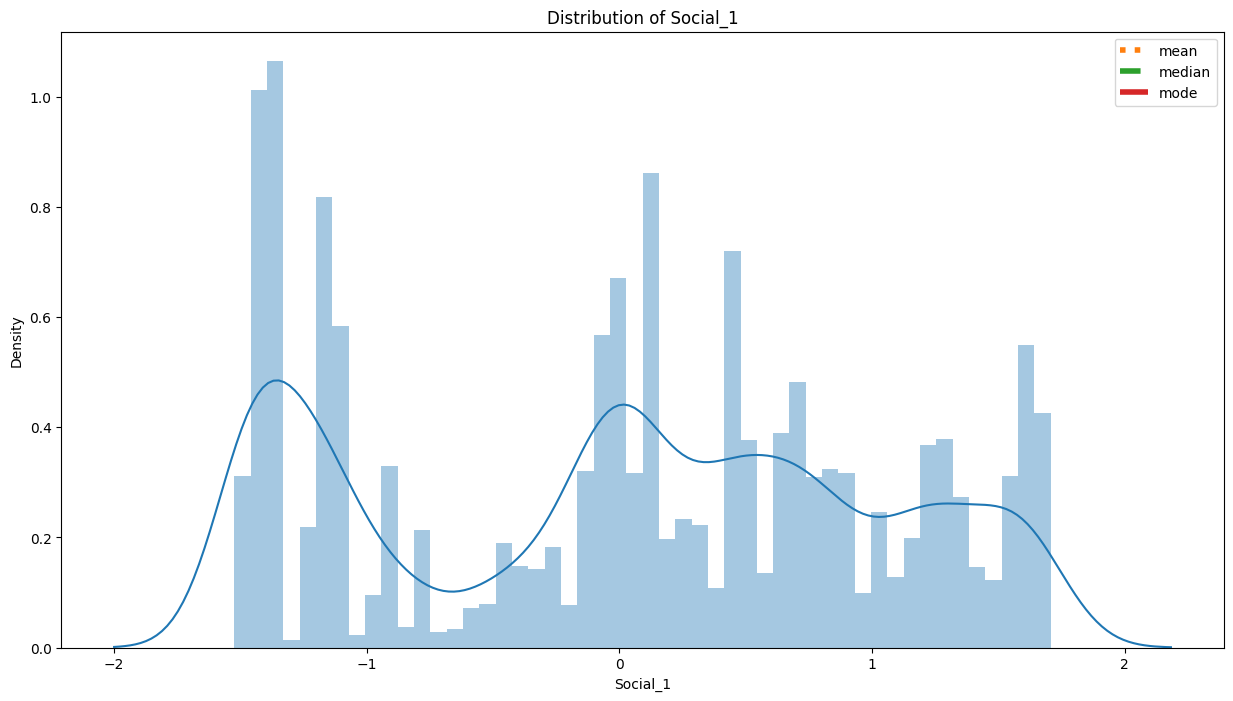

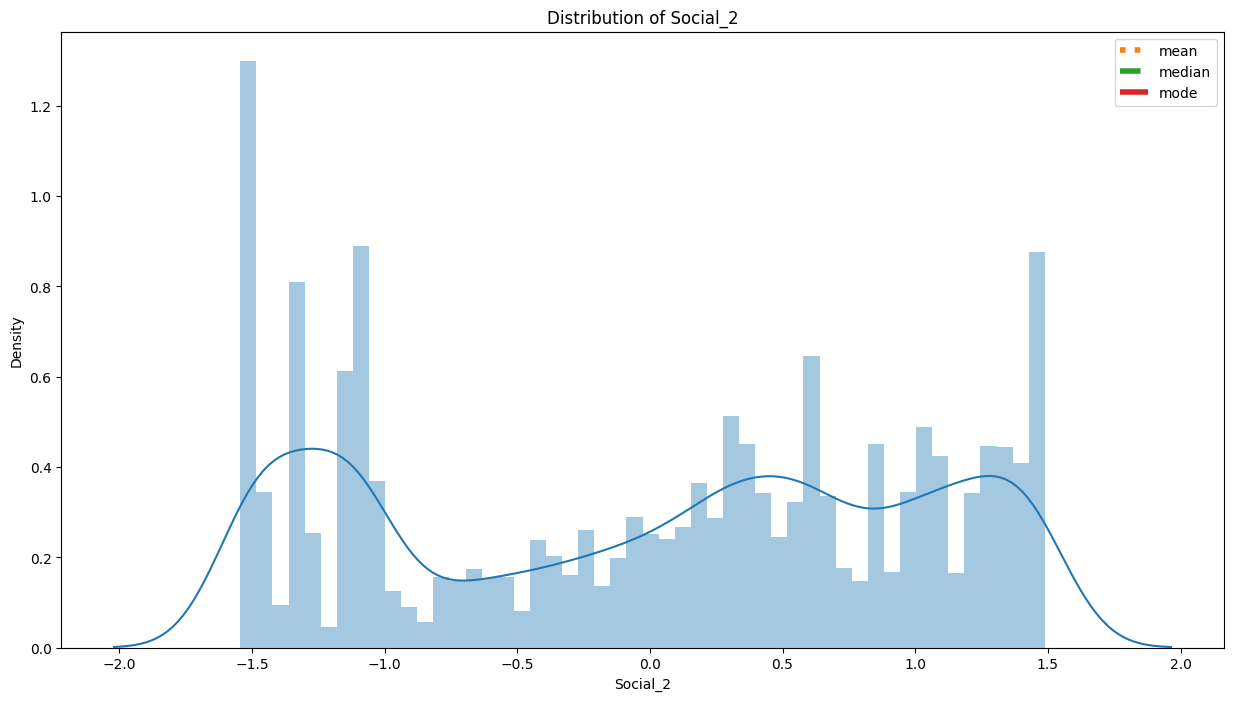

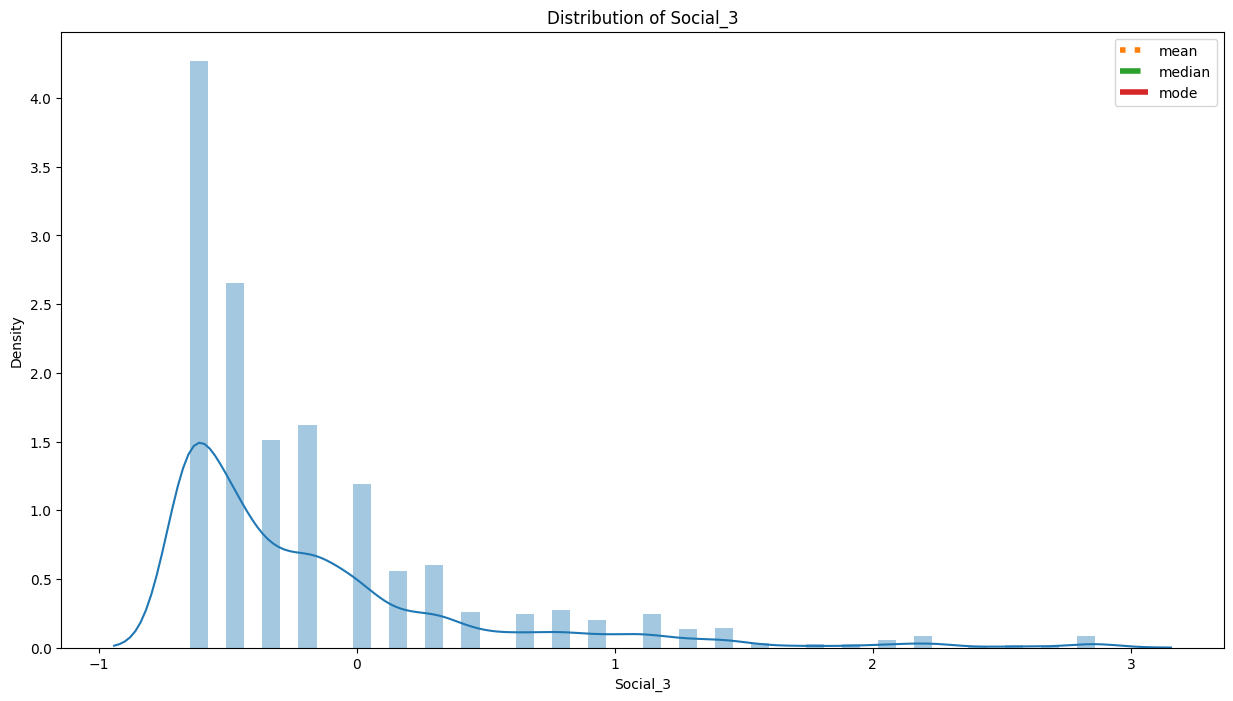

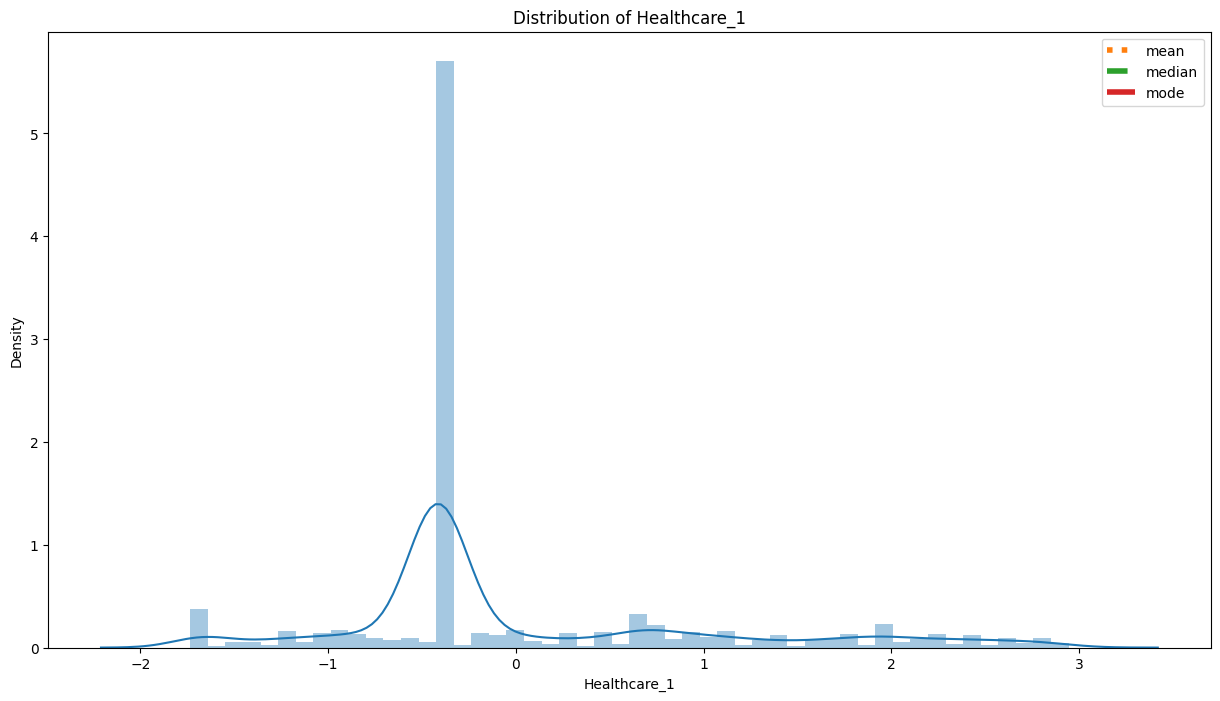

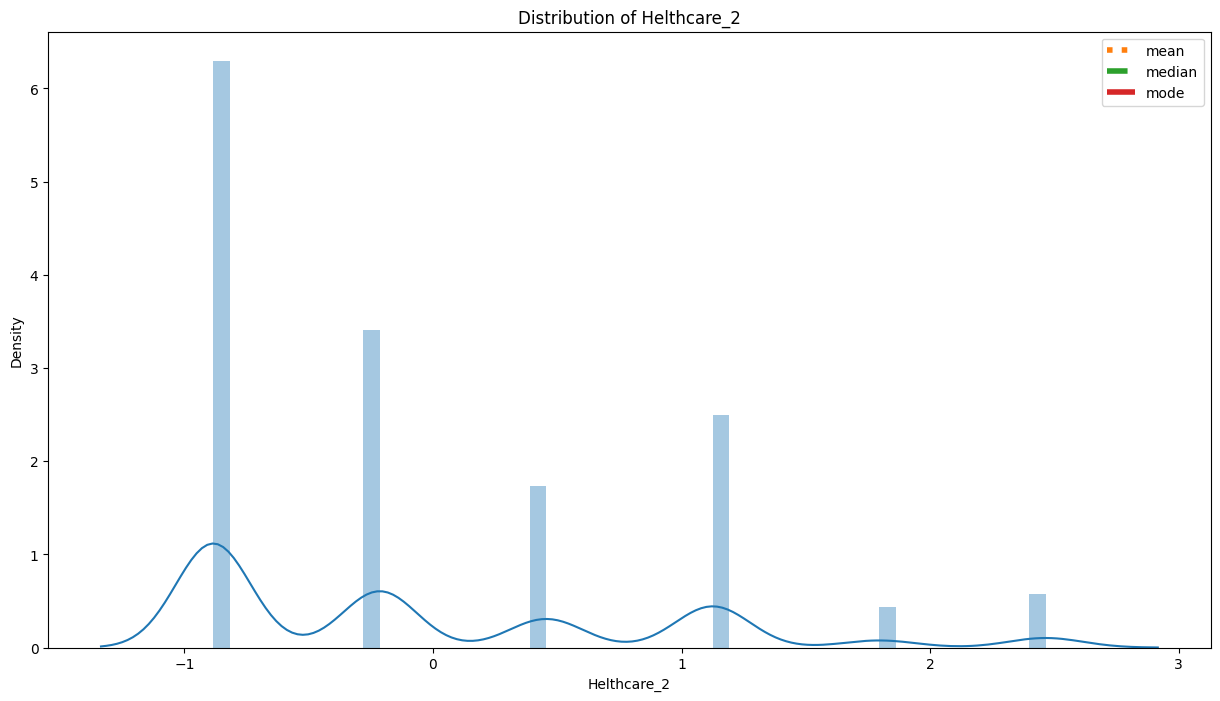

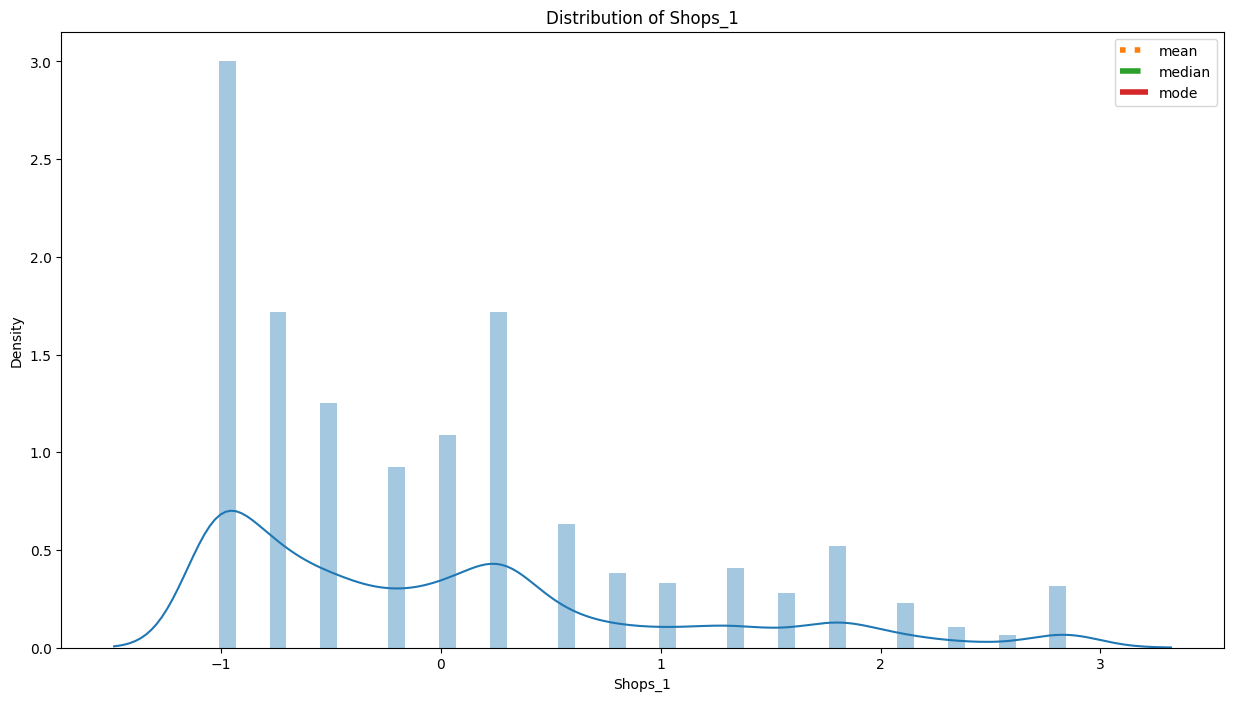

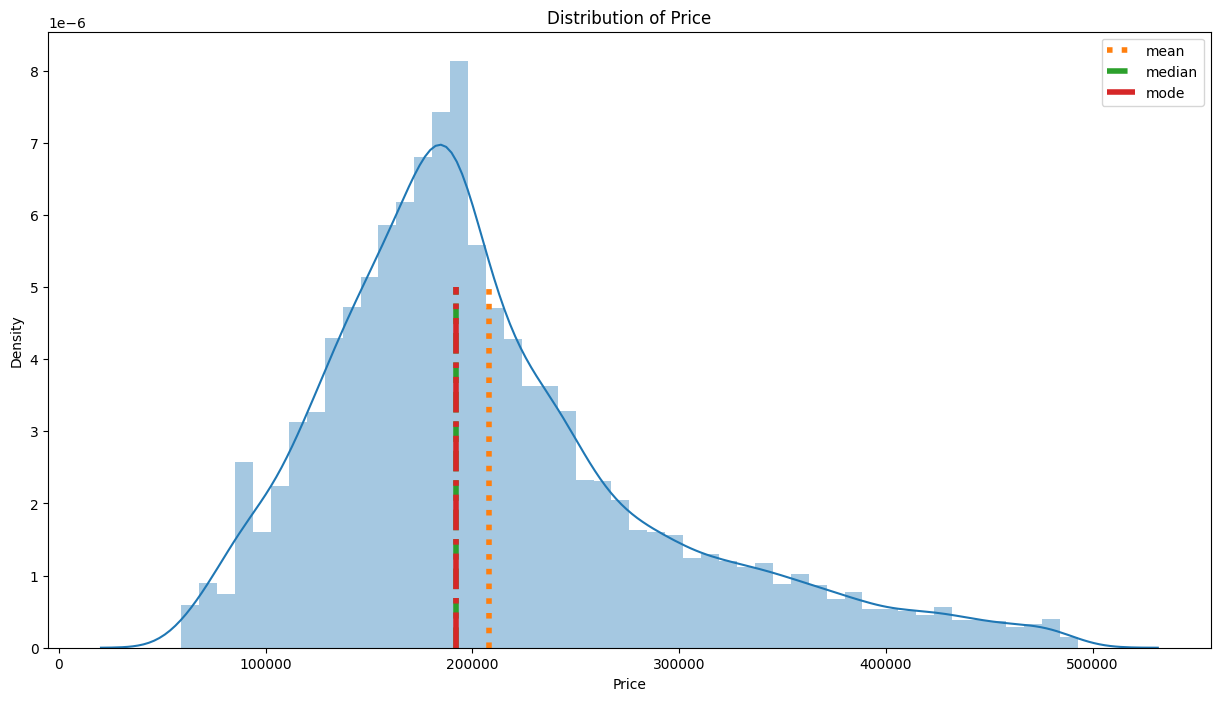

In [271]:
# распределение количественных признаков после нормализации данных и осноные статистические данные в них
for item in pipeline.property_num:
    pipeline.plot(item)